In [3]:
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
class City:
    
    def __init__(self, parent):
        """
        City class to be used in the infections deck and the player deck
        
        args
        -----------
        parent: Pandemic
            parent pandemic class
        """
        # set up citys name color and connections
        self.connections = None
        self.name = None
        self.color = None
        self.type = "city"
        
        self._parent = parent
        
        #self.red_infect = 0
        #self.blue_infect = 0
        #self.black_infect = 0
        #self.yellow_infect = 0
        
        # set up the infections cubes for this city
        self.infections = []
        self.tot_infection_number = 0
        
        # check if city has a research station
        self.has_research_station = False
        
    def outbreak(self,color):
        """
        make this city outbreak
        
        args
        ------
        color: string
            which color outbreaks
        """
        
        # infect each of the citys this is connected to 
        for cty in connections:
            self._parent.cities[cty].infect(color)
            
        # increases the number of outbreaks on the pandemic board (i.e. increase counter etc)
        self._parent.outbreak()
        
    def infect(self,color):
        """
        Infect a city with a certain disease color
        
        args
        -------------
        color: string
            which color to infect with
        """
        #cur_value = getattr(self, "{}_infect".format(color))
        #setattr(self, "{}_infect".format(color), cur_value + 1)
        
        #parent_cur_value = getattr(self._parent, "{}_disease".format(color))
        #setattr(self._parent, "{}_disease".format(color), parent_cur_value - 1)
        
        # add this color sube to the infections of this city
        self.infections.append(color)
        # remove this infection color from the set of cubes on the board
        self._parent.diseases.remove(color)
        
        # if the disease cubes of a certain color is 0 you have lost the game
        if self._parent.diseases.count(color) == 0:
            self._parent.lose("Run out of infection cubes")
           
        # increase this citys infection number
        self.tot_infection_number += 1
        
        # if the total number of infection cubes on this city is greater than 3 outbreak
        if self.tot_infection_number > 3:
            self.outbreak(color)
            
    def treat(self,color):
        """
        treat an infection of a city
        
        args
        --------
        color: string
            which color to treat
        """
        
        # if this disease color is already cured remove all cubes of this color from this city and add back to pool of disease cubes
        if color in self._parent.cured:
            while color in self.infections:
                self.infections.remove(color)
                self._parent.diseases.append(color)
        else:
            # if it is not cured just remove one cube and add to pool
            self.infections.remove(color)
            self._parent.diseases.append(color)
    
        

In [20]:
class InfectionDeck:
    
    def __init__(self,parent):
        """
        Class for the infections deck
        
        args
        -----------
        parent: Pandemic
            parent pandemic class
        """
        self._parent = parent
        
        # add citys to the deck
        self.deck = self._parent.cities.keys()
        
        # set up the discard pile
        self.discard = []
        
        #shuffle the deck
        random.shuffle(deck)
        
    def turn(self):
        """
        complete a turn of the infection deck
        """
        
        # select 3 cities from the top of the deck
        selected = []
        for cty in range(3):
            selected.append(self.deck.pop(cty))
        
        # infect each of these cities
        for cty in selected:
            self._parent.cities[cty].infect(color = self._parent.cities[cty].color)
        
        # add these cities to the discard pile
        self.discard.extend(selected)
            
    def shuffle_discard(self):
        """
        shuffle the discard and add to top of deck
        """
        #shuffle discard
        random.shuffle(discard)
        
        # add to deck
        for i in discard:
            self.deck.insert(0,i)
        
        #empty the discard deck
        self.discard = []
            
    
        
        
        
    

In [11]:
class PlayerDeck:
    
    def __init__(self,parent):
        """
        Class for the player deck
        
        args
        -----------
        parent: Pandemic
            parent pandemic class
        """
        self._parent = parent
        
        # add the cities to the player deck
        self.deck = self._parent.cities
        
        # set the order of the deck so card can be drawn from the to
        # python dictionaries are not ordered, also need to add epidemic card in here
        self.order = self.deck.keys()
        
        # setup the player deck discard
        self.discard = {}
        
    def shuffle(self):
        """
        shuffle the player deck
        """
        #shuffle the deck
        random.shuffle(self.order)
        
    def draw(self,player):
        """
        draw a card from the deck for a given player
        args
        ------
        player: string
            name of the player to draw a card
        """
        # remove name from first card of order list
        name = self.order.pop(0)
        #remove this card from the dekc dictionary
        val = self.deck.pop(name)
        # add this card the the players hand
        self._parent.players[player].hand[name] = val
        
        del name,val

        
        
class Epidemic(PlayerDeck):
    
    def __init__(self):
        pass
    
    def play(self):
        pass
        

In [12]:
class Player:
    
    def __init__(self,name,parent):
        """
        General class for player
        """
        self.name = name
        self._parent = parent
        
        #defualt start location is atlanta
        self.location = "Atlanta"
        
        #number of actions per turn is 0
        self.actions = 0
        
        # setup hand as empty dictionary
        self.hand = {}
        
    def end_turn(self):
        """
        end turn
        """
        # at end of turn reset the actions to zero
        self.actions = 0
        
        #self._parent.infect
        
    def increase_action(self):
        """
        increase the number of actions
        """
        self.actions += 1
        # if the number of actions is 4 then the turn ends
        if self.actions == 4:
            self.end_turn()
    
    def get_player_card(self):
        """
        draw a card from the player deck
        """
        self._parent.player_deck.draw(self.name)
    
    def move(self,city):
        """
        move to another city, maximum moves is number of actions left
        
        args
        ---------
        city: string
            city name to move to
        """
        
        # find the shortest path to this city on the board
        shortest_path = nx.shortest_path(self._parent.board,source=self.location,target=city)
        
        # if the city is furhter awaw than th number of ations left then raise error
        if len(shortest_path) > 4 - self.actions :
            raise Exception("Cannot move here: only {} actions left".format(self.actions))
        else:
            # set player location to this city adn increase the actions by number of moves
            self.location = city
            for i in range(len(shortest_path)):
                self.increase_action()
    
    def direct_fly(self,city):
        """
        directly fly to a city if city in hand
        args
        ---------
        city: string
            city to fly to
        """
        if city in self.hand:
            self.location = city
            #remove city from hand and add it to the player deck discard pile
            card = self.hand.pop(city)
            self._parent.player_deck.discard[card.name] = card
            # increase number of actions taken
            self.increase_action()
        else:
            raise Exception("You do not have this City")
    
    def charter_fly(self,city):
        """
        fly to any other city if you have the card of the city you are in
        args
        -------
        city: string
            which city to move to
        """
        if self.location in self.hand.keys():
            #if you have the current location card change your location
            self.location = city
            # remove this city from you hand and add to the player deck discard
            card = self.hand.pop(self.location)
            self._parent.player_deck.discard[card.name] = card
            self.increase_action()
    
    def shuttle_fly(self,city):
        """
        if you are in a city with a research station fly to any other city with a research station
        args
        -----------
        city: string
            which city to fly to
        """
        if self._parent.citys[self.location].has_research_station == True and self._parent.citys[city].has_research_station:
            self.location = city
            self.increase_action()
            
    def build_research_station(self,city=None):
        """
        build a research station in the city which you are in  
        """
        if self.location in self.hand:
            # check if all research stations have been used
            if self._parent.research_stations !=0:
                if self._parent.cities[self.location].has_research_station:
                    raise Exception("This city already has a research station")
                # add research station to current city
                self._parent.cities[self.location].has_research_station = True
                self._parent.research_stations -= 1
                self.increase_action()
            else:
                # if all research stations have been used up, take one from another city, where city is deifed
                if city is not None:
                    self._parent.citys[city].has_research_station = False
                    self._parent.citys[self.location].has_research_station = True
                    self.increase_action()
                
                else:
                    raise Exception("Please define a city to take the research station from")
    
    def treat_disease(self,color=None):
        """
        treat a disease in your current city
        
        args
        ----------
        color: string (optional)
            treat the current city of cubes with this color (defualt color is the color of the city you are in)
        """
        # set color if not defined
        if color is None:
            color = self._parent.cities[self.location].color

        self._parent.cities[self.location].treat(color)
        self.increase_action()
    
    def discover_cure(self,color):
        """
        discover a cure for a given color
        
        args
        ---------
        color: string
            color to discover the cure for
        """
        
        # dont cure if already cured
        if color in self._parent.cured:
            raise Exception("This disease is already cured")
        
        elif self._parent.cities[self.location].has_research_station:
            # if it has a research station then cure the city
            
            #check if have enough cities of correct color
            
            ctys = {}
            for nm,cty in self.hand.items():
                if cty.type == "city":
                    if cty.color = color:
                        ctys[nm] = cty
                        
            num_color = len(ctys)
            if num_color >= 5:
                self._parent.cured.append(color)
                card_count = 0
                while card_count < 5:
                    for nm,card in ctys.items():
                        crd = self.hand.pop(nm)
                        self._parent.player_deck.discard[crd.name] = crd 
                        card_count += 1
                self.increase_action()
        else:
            raise Exception("This city does not have a research station")
    
    def share_knowledge(self,player,direction="give"):
        
        if self.location in self.hand:
            if self.location == self._parent.players[player].location:
                if direction == "give":
                    crd = self.hand.pop(self.location)
                    self.players[player].hand[crd.name] = crd
                    self.increase_action()
                elif direction == "take":
                    crd = self.players[player].hand.pop(self.location)
                    self.hand[crd.name] = crd
                    self.increase_action()
            else:
                raise Exception("Not in same location as other player")
        else:
            raise Exception("You do not have the city card of your current location")
    
    def skip(self):
        
        self.end_turn()
        
    def play_card(self,card):
        
        if card in self.hand.keys():
            crd = self.hand.pop(card)
            crd.play()
        
    
class Scientist(Player):
    
    def __init__(self,name, parent):
        
        self._parent = parent 
        
        self.name = name
        
    def discover_cure(self,color):
        
        if color in self._parent.cured:
            raise Exception("This disease is already cured")
        
        elif self._parent.cities[self.location].has_research_station:
            
            ctys = {}
            for nm,cty in self.hand.items():
                if cty.type == "city":
                    if cty.color = color:
                        ctys[nm] = cty
                        
            num_color = len(ctys)
            if num_color >= 4:
                self._parent.cured.append(color)
                card_count = 0
                while card_count < 5:
                    for nm,card in ctys.items():
                        crd = self.hand.pop(nm)
                        self._parent.player_deck.discard[crd.name] = crd 
                        card_count += 1
                self.increase_action()
        else:
            raise Exception("This city does not have a research station")
            
            
class Medic(Player):
    
    def __init__(self,name,parent):
        
        self._parent = parent 
        
        self.name = name
        
class Dispatcher(Player):
    
    def __init__(self,parent):
        
        self._parent = parent 
        
        self.name = name
        
class OperationsExpert(Player):
    
    def __init__(self,parent):
        
        self._parent = parent 
        
        self.name = name
        
class Researcher(Player):
    
    def __init__(self,parent):
        
        self._parent = parent 
        
        self.name = name
        
class QuarantineSpecialist(Player):
    
    def __init__(self,parent):
        
        self._parent = parent 
        
        self.name = name
        
class ContingencyPlanner(Player):
    
    def __init__(self,parent):
        
        self._parent = parent 
        
        self.name = name

In [13]:
import configparser 
import json

class Pandemic:
    
    def __init__(self):
        
        self.cities = {}
        self.connections = []
        
        self.read_cities()
        
        self.infection_rate_ind = 0
        self.infection_rate = 2
        self.outbreaks = 0
        
        self.cured = []
        self.eradicated = []
        
        self.research_stations = 5
        
        self.diseases = ["red"]*24 + ["blue"]*24 + ["black"]*24 + ["yellow"]*24
        self.red_disease = self.diseases.count("red")
        self.blue_disease = self.diseases.count("blue")
        self.black_disease = self.diseases.count("black")
        self.yellow_disease = self.diseases.count("yellow")
        
        self.players = []
    
    def add_city(self, city):
        
        """
        Add a city to the game.
        Parameters
        ------------
        city: City
            city which is to be added to the game
        """
        if not city.name in self.cities.keys():
            self.cities[city.name] = city

    def outbreak(self):
        
        infection_rates = [2,2,2,3,3,4,4]
        
        self.infection_rate_ind += 1
        self.infection_rate = infection_rates[self.infection_rate_ind]
        
        self.outbreaks += 1
        
    def lose(self,msg)
    
        print("You have lost the game because: {}".format(msg))
        
        return 0
        
    def read_cities(self):
        
        cp = configparser.ConfigParser()
        cp.read("connections.ini")
        
        for key,vals in cp.items():
            temp_city = City(self)
            temp_city.name = key
            for val in vals:
                ent = cp.get(key,val)
                if val == "connections":
                    ent = [i.strip(" ") for i in ent.strip("[]").strip("]").split(",")]
                setattr(temp_city,val,ent)
                self.add_city(temp_city)
            del temp_city
            
    def create_graph(self):
        
        self.board = nx.MultiGraph()
        
        connections = []
        
        for city in self.cities.values():
            
            self.board.add_node(city.name, data = city)
            
            for con in city.connections:
                if (city.name,con) in connections or (con,city.name) in connections:
                    continue
                else:
                    self.board.add_edge(city.name,con)
                    connections.append((city.name,con))

                    
    def plot_model(self):
        """
        pot the model using networkx
        """
        nodes = self.board.nodes()
        labels = {n:n for n in nodes}
        plt.figure()
        pos = nx.spring_layout(self.board)
        ex = nx.draw_networkx_edges(self.board, pos, alpha = 0.2)
        nc = nx.draw_networkx_nodes(self.board, pos, nodelist=nodes, node_size=300)
        lc = nx.draw_networkx_labels(self.board, pos, labels)
        plt.axis('off')
        plt.show()


In [14]:
pd = Pandemic()

In [15]:
pd.read_cities()

In [16]:
pd.create_graph()

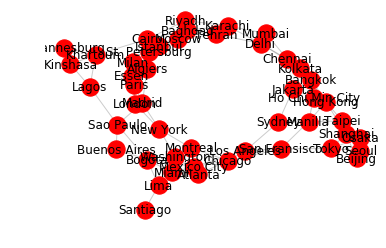

In [27]:
pd.plot_model()

In [22]:
nx.shortest_path(pd.board,"London","Jakarta")

['London',
 'New York',
 'Montreal',
 'Chicago',
 'Los Angeles',
 'Sydney',
 'Jakarta']